In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Defining the CNN model

In [13]:
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3,64,kernel_size=3,stride=1,padding=1)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1)
        self.fc1 = nn.Linear(128*32*32,512)
        self.fc2 = nn.Linear(512,num_classes)

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

In [16]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

### Datasets

#### Load datasets

In [17]:
train_dataset = datasets.ImageFolder(root='./dataset/Training', transform=transform)
test_dataset = datasets.ImageFolder(root='./dataset/Testing/', transform=transform)

#### Create loaders

In [18]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=32,shuffle=True)

In [19]:
model = BrainTumorCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
num_epochs = 10
losses = []

In [21]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    epoch_loss = running_loss/len(train_loader)
    losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/10], Loss: 0.8584
Epoch [2/10], Loss: 0.4000
Epoch [3/10], Loss: 0.2807
Epoch [4/10], Loss: 0.1867
Epoch [5/10], Loss: 0.1358
Epoch [6/10], Loss: 0.0861
Epoch [7/10], Loss: 0.0531
Epoch [8/10], Loss: 0.0343
Epoch [9/10], Loss: 0.0193
Epoch [10/10], Loss: 0.0112


### Plotting loss-iteration graph

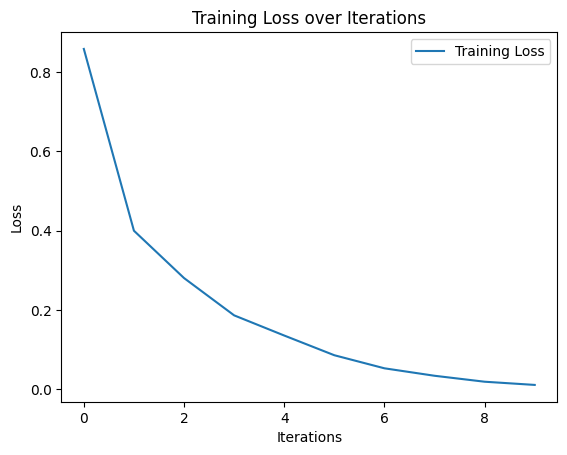

In [22]:
plt.plot(losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.show()